In [2]:
%matplotlib inline
# useful additional packages
#import math tools
import numpy as np
# We import the tools to handle general Graphs
import networkx as nx
# We import plotting tools
import matplotlib.pyplot as plt
from matplotlib import cm

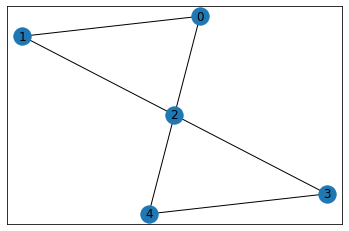

In [4]:
# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

n = 5
V = np.arange(0,n,1)
E =[(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)]
G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

nx.draw_networkx(G)




In [12]:
step_size = 0.1;
a_gamma = np.arange(0, np.pi, step_size)
a_beta = np.arange(0, np.pi, step_size)
a_gamma, a_beta = np.meshgrid(a_gamma,a_beta)
F1 = 3-(np.sin(2*a_beta)**2*np.sin(2*a_gamma)**2-0.5*np.sin(4*a_beta)*np.sin(4*a_gamma))*(1+np.cos(4*a_gamma)**2)
result = np.where(F1 == np.amax(F1))



In [13]:
result[0]*0.1
result[1]*0.1
a= list(zip(result[0],result[1]))[0] 
gamma = a[0]*step_size; 
beta = a[1]*step_size;


In [10]:
# prepare the quantum and classical resisters
QAOA = QuantumCircuit(len(V), len(V))
# We apply the layer of Hadamard gates to all qubits
QAOA.h(range(len(V)))
QAOA.barrier()

In [11]:
# apply the Ising type gates with angle gamma along the edges in E
for edge in E:
    k = edge[0]
    l = edge[1]
    QAOA.cu1(-2*gamma, k, l)
    QAOA.u1(gamma, k)
    QAOA.u1(gamma, l)

In [ ]:
# Apply the single qubit X - rotations with angle beta to all qubits
QAOA.barrier()
QAOA.rx(2*beta, range(len(V)))

In [ ]:
# Measure the result in the computational basis
QAOA.barrier()
QAOA.measure(range(len(V)),range(len(V)))

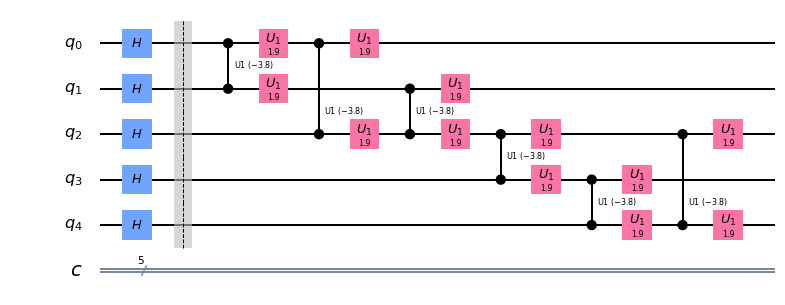

In [14]:
# Draw the circuit for comparison
QAOA.draw(output='mpl')